# Lesson 2: Linear Regression

## Regression VS Classification

Regression algorithms predict a continuous value based on the input variables. The main goal of regression problems is to estimate a mapping function based on the input and output variables. Classification is a predictive model that approximates a mapping function from input variables to identify discrete output variables, which can be labels or categories.


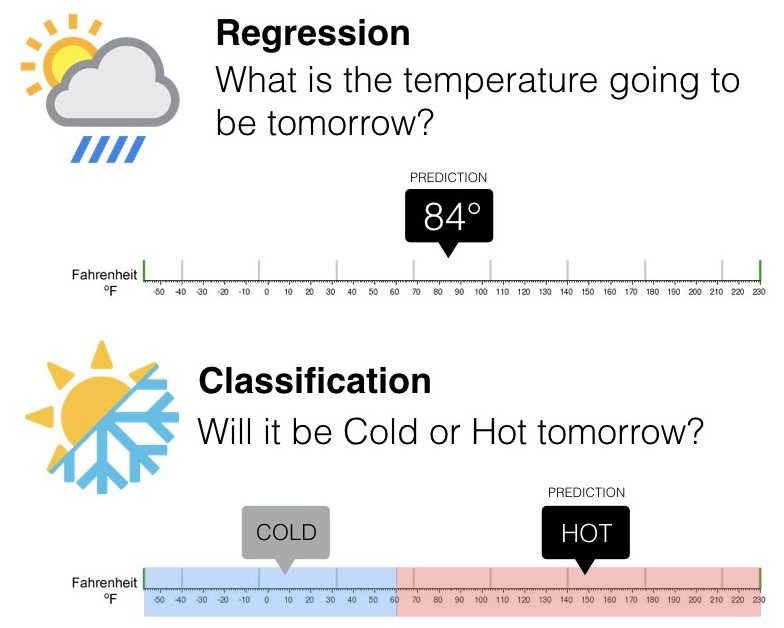

In [2]:
from IPython import display
display.Image("Image/ClassificationVSRegression.png")

### Regression metrics (for testing)

More detail at (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

Metrics as:
- Mean absolute error (MAE)
- Mean squared error (MSE)
- Root mean squared error (RMSE)
- Root mean squared logarithmic error (RMSLE)
- Mean percentage error (MPE)
- Mean absolute percentage error (MAPE)
- R-square (R^2)

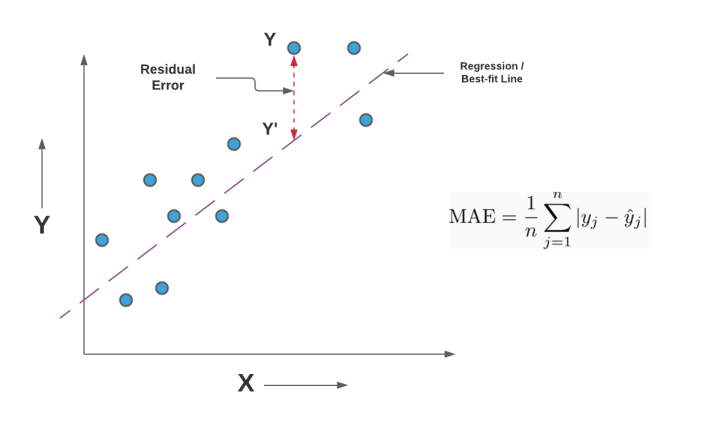

In [3]:
display.Image("Image/MAE_Graph.png")

### Metrics Classification

More detail at (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

The evelaution of perfomance ar based on the Confusion Matrix
- Accuracy
- Precision (P)
- Recall (R)
- F1 score (F1)
- Area under the ROC (Receiver Operating Characteristic) curve or simply Area Under Curve (AUC)
- Matthew Correlation Coefficient


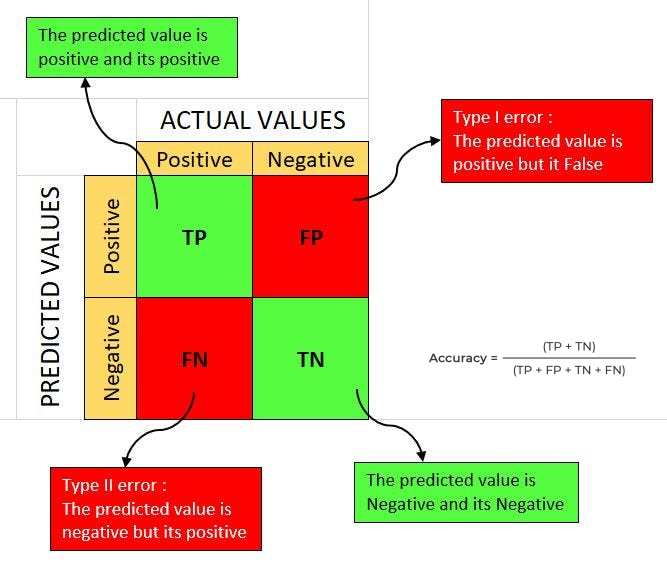

In [4]:
display.Image("Image/ConfusionMatrix1.png")

## Regression Example

In [5]:
#necessary imports
from sklearn import datasets
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Linear Regression - Generated Dataset

In this part, all the code is already written. We ask you the deeply understand what it does and to play with the parameters.

It is highly recommanded to read the documentation there: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression

#### 1. Data generation

In [6]:
from sklearn.datasets import make_regression

In [7]:
X, y, coeff = make_regression(n_samples=1000, n_features=2, bias = 2.0, coef=True, noise=2, random_state=42)

**Question 1:** With the help of the documentation, explain the different parameters. Try with and without noise, with dimension 1, 2 and more.

**Your answer here**

#### 2. Visualization

This cell displays 2d input data (i.e. with 2 features). The color scale represents the output y values.

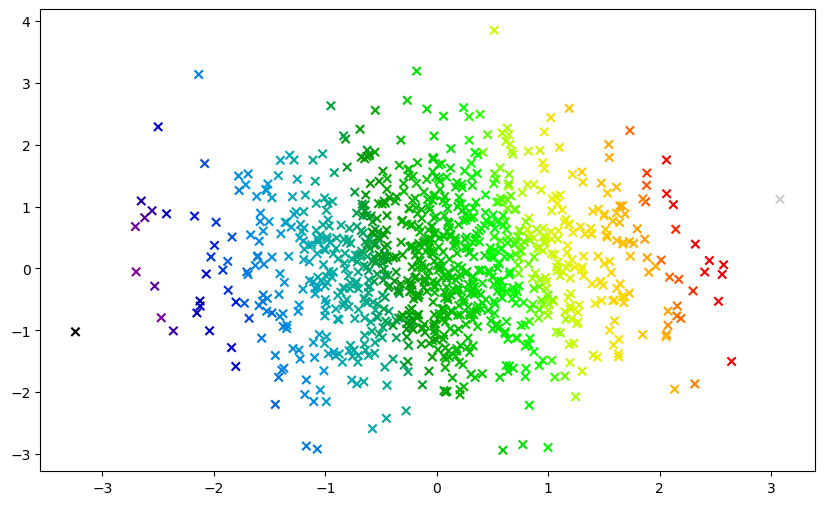

In [8]:
colors = [cm.nipy_spectral(float(i) / 255) for i in range(256)]

max = np.max(y)
min = np.min(y)
ycol = 255*(y-min)/(max-min)
ycol = ycol.astype('int')

col = [colors[yc] for yc in ycol]
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], color = col, marker="x")

Let's try and visualize the relationship of each feature with the output

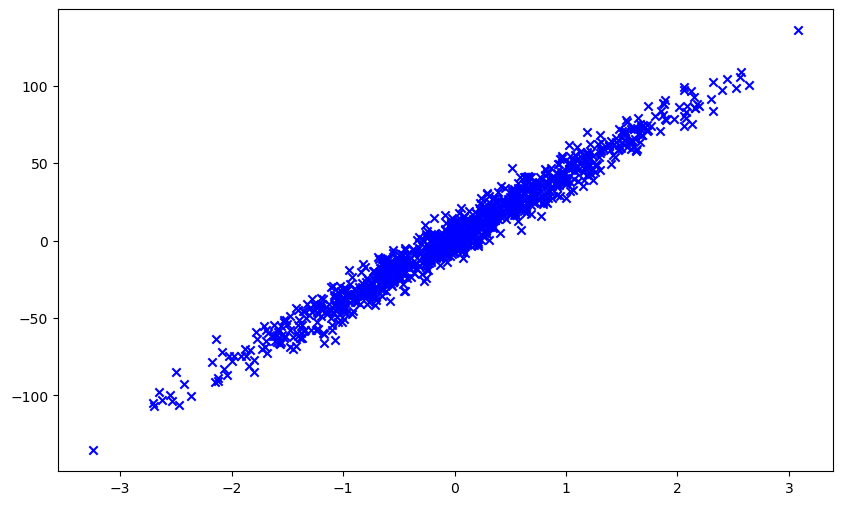

In [9]:
# plot the first feature against the y values
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color = 'b', marker="x")

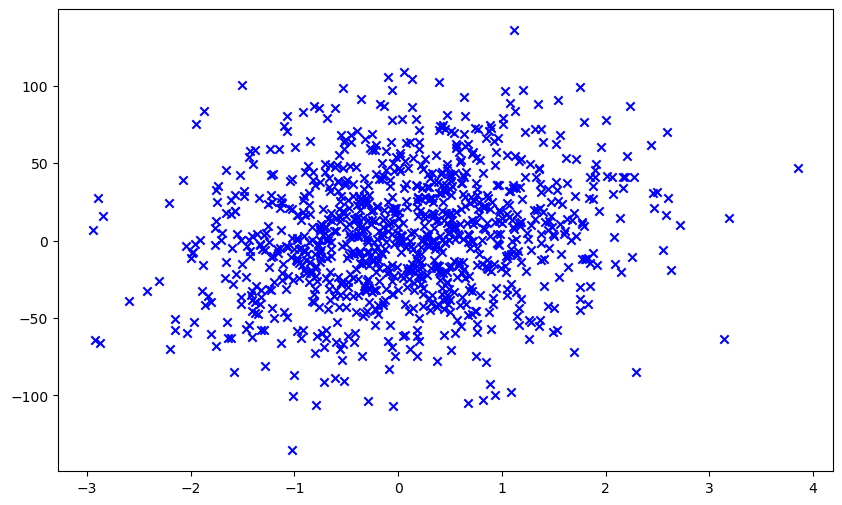

In [10]:
# plot the second feature against the y values
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], y, color = 'b', marker="x")

What can you understand from this plot?

**Your answer here**

#### 3. Split dataset in Train and Test

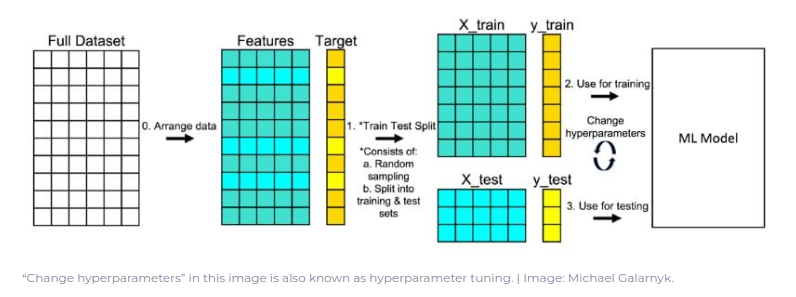

In [11]:
display.Image("Image/Split Dataset.png")

In [12]:
# Splitting train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Always check the size of the data

In [13]:
# Shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 2)
(800,)
(200, 2)
(200,)


#### 4. Estimation (training)

In [14]:
# Constructor call and training procedure
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

#### 5. Prediction

In [15]:
y_pred_train = lr.predict(X_train)

In [16]:
# Predict on Test dataset
y_pred_test = lr.predict(X_test)

#### 6. Testing: evaluation with regression metrics

Calculate $E_{in}$ and $E_{out}$ with the same evaluation metric

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Train MAE score: ", mean_absolute_error(y_train, y_pred_train))
print("Test MAE score: ", mean_absolute_error(y_test, y_pred_test))

Train MAE score:  1.563504546765267
Test MAE score:  1.6099113375011995


In [18]:
print("Train MSE score: ", mean_squared_error(y_train, y_pred_train))
print("Test MSE score: ", mean_squared_error(y_test, y_pred_test))

print("Train R2 score: ", r2_score(y_train, y_pred_train))
print("Test R2 score: ", r2_score(y_test, y_pred_test))

Train MSE score:  3.798066642759468
Test MSE score:  4.184948377213009
Train R2 score:  0.9976299039082281
Test R2 score:  0.9972498698830982


**Question 2:** What does this score represent? Is it good? (try to answer using the different options proposed for the dataset creation).

**Your answer here**

We can also compare the true linear coefficients with the coefficients found by the linear regression in the case of generated dataset:

In [19]:
print(coeff)

[40.71064891  6.60098441]


In [20]:
print(lr.coef_, lr.intercept_)

[40.77913694  6.62570067] 1.9719726012312528


## Example of under/overfitting

In [21]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# Generate training samples
x_train = np.random.rand(100,1)
y_train = - x_train + 3 * (x_train ** 2) - 2 * (x_train ** 3) + 2 + np.random.rand(100,1) * 0.1

# Generate some outlier points in the dataset
x_train_noise = np.random.rand(10,1)
y_train_noise = - x_train_noise + 3 * (x_train_noise ** 2) - 2 * (x_train_noise ** 3) + 2 \
                + np.random.rand(10,1) * 0.5

# Combine 'normal' points and 'outlier' points to a single training set
x_train = np.concatenate((x_train, x_train_noise), axis=0)
y_train = np.concatenate((y_train, y_train_noise), axis=0)

# Generate test samples
x_test = np.random.rand(20,1)
y_test = - x_test + 3 * (x_test ** 2) - 2 * (x_test ** 3) + 2 + np.random.rand(20,1) * 0.1

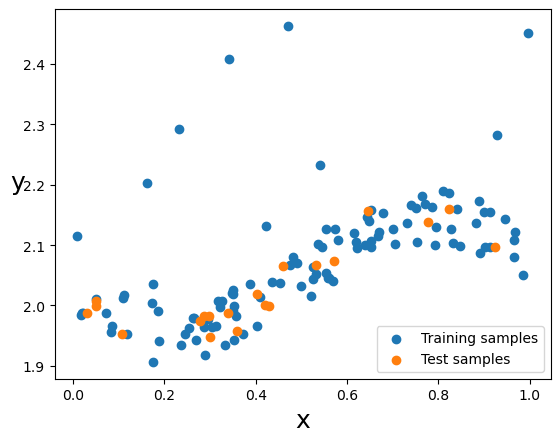

In [22]:
# Plot training samples
plt.scatter(x_train,y_train, label='Training samples')
plt.scatter(x_test,y_test, label='Test samples')
plt.xlabel('x', fontsize=18)
plt.ylabel('y', rotation=0, fontsize=18)
plt.legend()

##### Degree 1: Underfit

In [23]:
# Generate polynomial features
polynomial_features= PolynomialFeatures(degree=1)
x_train_poly = polynomial_features.fit_transform(x_train)[:,1:]
x_test_poly = polynomial_features.fit_transform(x_test)[:,1:]

# Create linear regression model
model = LinearRegression()

# fit model to polynomial data
model.fit(x_train_poly, y_train)

# print fitted model
print('Coef:', model.coef_, 'Intercept:', model.intercept_)

print('Train score:', mean_squared_error(model.predict(x_train_poly), y_train))
print('Test score:', mean_squared_error(model.predict(x_test_poly), y_test))

Coef: [[0.21321289]] Intercept: [1.96651258]
Train score: 0.006953761428980989
Test score: 0.0020992078789674093


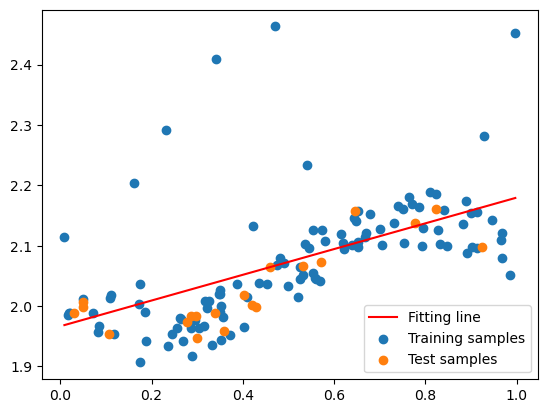

In [24]:
idx = np.argsort(x_train, axis=0)[:,0]
plt.plot(x_train[idx], model.predict(x_train_poly)[idx], 'r', label='Fitting line')
plt.scatter(x_train,y_train, label='Training samples')
plt.scatter(x_test,y_test, label='Test samples')
plt.legend()

##### Correct Polinomial

In [25]:
# Generate polynomial features
polynomial_features= PolynomialFeatures(degree=3)
x_train_poly = polynomial_features.fit_transform(x_train)[:,1:]
x_test_poly = polynomial_features.fit_transform(x_test)[:,1:]

# Create linear regression model
model = LinearRegression()

# fit model to polynomial data
model.fit(x_train_poly, y_train)

# print fitted model
print('Coef:', model.coef_, 'Intercept:', model.intercept_)

print('Train score:', mean_squared_error(model.predict(x_train_poly), y_train))
print('Test score:', mean_squared_error(model.predict(x_test_poly), y_test))

Coef: [[-0.28004011  1.15949557 -0.74539874]] Intercept: [2.0139994]
Train score: 0.00674826423151428
Test score: 0.0013430348904055235


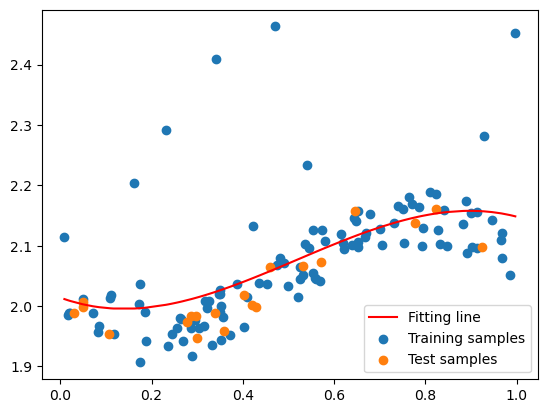

In [26]:
idx = np.argsort(x_train, axis=0)[:,0]
plt.plot(x_train[idx], model.predict(x_train_poly)[idx], 'r', label='Fitting line')
plt.scatter(x_train,y_train, label='Training samples')
plt.scatter(x_test,y_test, label='Test samples')
plt.legend()

##### High Degree: Overfit

In [27]:
# Generate polynomial features
polynomial_features= PolynomialFeatures(degree=30)
x_train_poly = polynomial_features.fit_transform(x_train)[:,1:]
x_test_poly = polynomial_features.fit_transform(x_test)[:,1:]

# Create linear regression model
model = LinearRegression()

# fit model to polynomial data
model.fit(x_train_poly, y_train)

# print fitted model
print('Coef:', model.coef_, 'Intercept:', model.intercept_)

print('Train score:', mean_squared_error(model.predict(x_train_poly), y_train))
print('Test score:', mean_squared_error(model.predict(x_test_poly), y_test))

Coef: [[-2.33663630e+02  1.67377865e+04 -6.13724798e+05  1.33725666e+07
  -1.89197618e+08  1.83746497e+09 -1.26871106e+10  6.35571708e+10
  -2.32661684e+11  6.17152732e+11 -1.14636220e+12  1.35130141e+12
  -6.62266971e+11 -5.81156789e+11  9.39881170e+11  1.27262071e+11
  -8.77021940e+11 -7.63472457e+09  8.02221709e+11  4.93646302e+10
  -7.46384361e+11 -1.38154276e+11  7.04138995e+11  1.89649736e+11
  -7.16391182e+11 -7.32523834e+10  8.12461654e+11 -6.68343868e+11
   2.36209987e+11 -3.25448085e+10]] Intercept: [3.23588933]
Train score: 0.005110153370362646
Test score: 0.0016267721538727868


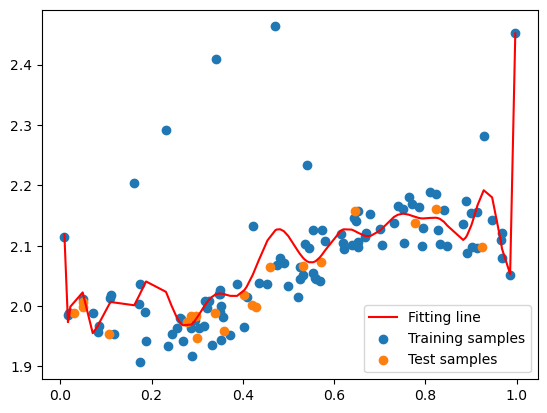

In [28]:
idx = np.argsort(x_train, axis=0)[:,0]
plt.plot(x_train[idx], model.predict(x_train_poly)[idx], 'r', label='Fitting line')
plt.scatter(x_train,y_train, label='Training samples')
plt.scatter(x_test,y_test, label='Test samples')
plt.legend()

### Linear Regression: Diabetes Dataset

In [29]:
# loading the dataset
diab = datasets.load_diabetes()
X = diab.data
y = diab.target

**Question 4:** how many data points ?

In [32]:
# answer here
X.shape

(442, 10)

**Question 5**: type of data ? dimension of data ? type of labels ?

In [38]:
# answer here
print(diab.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

**Question 5bis**: What are the features ?

In [ ]:
# answer here
diab.feature_names

**Question 6a:** Split train/test dataset

In [39]:
# answer here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Question 6b:** How many training data points? How many test data points?

In [60]:
# answer here

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y.min(), y.max())

(353, 10) (353,)
(89, 10) (89,)
25.0 346.0


**Question 7:** Linear regression. Create a default linear regression and train this regression.

In [44]:
# answer here
# Create linear regression model
model = LinearRegression()

# fit model to polynomial data
model.fit(X_train, y_train)

LinearRegression()

**Question 8a:** Print the score. What do they represent?

In [51]:
# answer here
print('Coef:', model.coef_, 'Intercept:', model.intercept_)

print("score_in", model.score(X_train, y_train))
print("score_out", model.score(X_test, y_test))

Coef: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743] Intercept: 151.34560453985995
score_in 0.5279193863361498
score_out 0.45260276297191915


**The score is the coefficient of determination $R^2$ of the model**

**Question 8b:** What are the MSE and RMSE values?

In [53]:
# answer here
print('Train MSE:', mean_squared_error(model.predict(X_train), y_train), (mean_squared_error(model.predict(X_train), y_train))**0.5)
print('Test MSE:', mean_squared_error(model.predict(X_test), y_test), (mean_squared_error(model.predict(X_test), y_test))**0.5)

Train MSE: 2868.5497028355776 53.55884336723094
Test MSE: 2900.1936284934827 53.85344583676594


**Question 9:** How could you test a non-linear regression as for example a second-degree polynomial?

In [72]:
# answer here
polynomial_features= PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)[:,1:]
X_test_poly = polynomial_features.fit_transform(X_test)[:,1:]

print(X_train_poly.shape)
print(X_test_poly.shape)

model = LinearRegression()

model.fit(X_train_poly, y_train)

print("score_in", model.score(X_train_poly, y_train))
print("score_out", model.score(X_test_poly, y_test))

(353, 65)
(89, 65)
score_in 0.6061583502354679
score_out 0.4156399336407999


In [ ]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, random_state=42, shuffle=True)

for train_index, test_index in cv.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]